<div style="text-align:center">
  <img src="https://goias.gov.br/imb/wp-content/uploads/sites/29/2021/10/idm2020_2021-fcb.jpg" />
</div>



O Índice de Desempenho dos Municípios – <b>IDM</b> é uma medida sintética de parte do contexto socioeconômico dos municípios em seis áreas de atuação: Economia, Educação, Infraestrutura, Saúde, Segurança e Trabalho. São ao todo 37 variáveis selecionadas para conferir o desempenho dos municípios goianos. O objetivo do índice é facilitar o diagnóstico e a comparação do desempenho dos municípios, bem como avaliar os resultados e subsidiar o planejamento das ações dos governos ao longo do tempo. Houve alteração metodológica na terceira edição do índice (2016), na qual foram acrescentadas três variáveis. A nova metodologia foi replicada para os anos anteriores com o intuito de se manter a série histórica do índice. O IDM tem periodicidade bianual.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
sns.set()

In [2]:
dfIDM = pd.ExcelFile(r'data/tabelas-IDM.xlsx')

                         PC1       PC2
IDM                 0.251271 -0.443740
IDM_Economia        0.489492  0.602306
IDM_Trabalho        0.191306  0.635281
IDM_Educacao        0.685790 -0.038547
IDM_Seguranca      -0.928603 -0.313921
IDM_Infraestrutura  0.799473 -0.558234
IDM_Saude          -0.380050 -0.604938


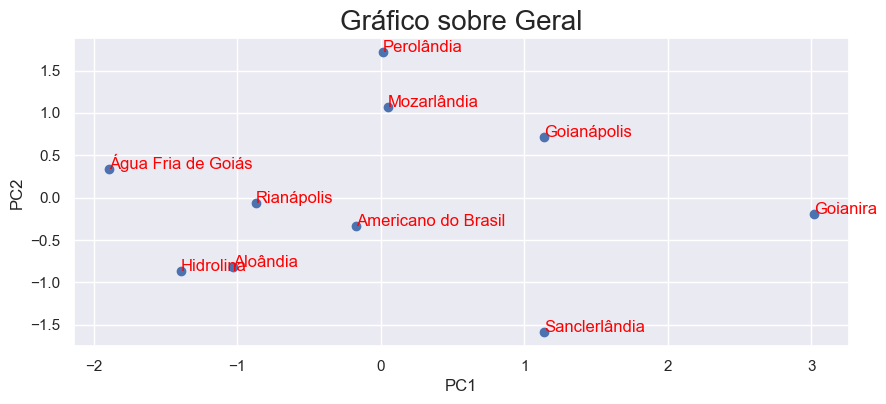

In [3]:
df= dfIDM.parse('Geral')
sheet = 'Geral'
df.set_index(df.columns[0], inplace=True)
df = df.sample(10)
df_temp = df.drop(df.columns[[1]], axis=1)
df = df.iloc[:,2:]

features = df.columns

pca = PCA(n_components=df.shape[1])
pca.fit(df)

PC1 = pca.fit_transform(df)[:,0]
PC2 = pca.fit_transform(df)[:,1]

dfCorrelacao = df.copy()
dfCorrelacao['PC1'] = PC1
df_temp['PC1'] = PC1
dfCorrelacao['PC2'] = PC2
df_temp['PC2'] = PC2
dfCorrelacao = dfCorrelacao.corr().iloc[0:-2,7:]
print(dfCorrelacao)
    
#Matriz de carga (loadings)
ldngs = pca.components_[:2]

components = pca.fit_transform(df)

colunas: list = []
for i in range(1,components.shape[1]+1):
    colunas.append('PC'+ str(i))

dfComponets = pd.DataFrame(data=components, columns=colunas)

dfPCA = pd.DataFrame(data=pca.components_.T, columns=colunas, index=df.columns)

# target_groups = np.digitize(Y, np.quantile(Y, [1/3, 2/3]))

fig, ax = plt.subplots(figsize=(10, 4))
 
scatter = ax.scatter(PC1, PC2)
 
ax.set_xlabel('PC1', fontsize=12)
ax.set_ylabel('PC2', fontsize=12)
ax.set_title('Gráfico sobre ' + sheet, fontsize=20)

for idx, row in df_temp.iterrows():
    ax.annotate(row['Municipio'], (row['PC1'], row['PC2']), color='red')

# ax.legend(*scatter.legend_elements(), loc='lower left', title='Grupos')
plt.savefig(r'img/grafico_'+sheet+'.png')

In [4]:
df_temp.sort_values('Municipio')

,Municipio,IDM,IDM_Economia,IDM_Trabalho,IDM_Educacao,IDM_Seguranca,IDM_Infraestrutura,IDM_Saude,PC1,PC2
COD_IBGE,,,,,,,,,,
5200506,Aloândia,5.13,2.13,2.70,5.30,9.14,2.97,8.53,-1.030764,-0.812699
5200852,Americano do Brasil,4.89,1.79,2.90,5.35,8.13,3.13,8.06,-0.171209,-0.336500
5208806,Goianira,5.16,2.80,2.99,6.81,5.80,4.70,7.86,3.015164,-0.195997
5208400,Goianápolis,5.12,2.33,3.79,6.75,7.07,3.06,7.74,1.138694,0.721489
5209804,Hidrolina,4.94,1.78,1.71,6.36,9.25,2.22,8.30,-1.394630,-0.860253
5214002,Mozarlândia,4.51,2.49,2.53,5.70,7.59,2.22,6.55,0.051240,1.072230
5216452,Perolândia,5.10,3.06,4.51,5.60,7.83,2.21,7.36,0.013183,1.715311
5218706,Rianápolis,4.94,1.89,2.95,5.60,8.72,2.49,7.96,-0.868529,-0.058038
5219001,Sanclerlândia,5.45,2.29,2.97,5.89,8.26,5.06,8.25,1.138888,-1.587046
